# **<font color='#AC33FF '>FACE MASK CLASSIFICATION</font>**                

---


**Objective**:To classify whether a person in a given/captured image is 
wearing a mask or not.




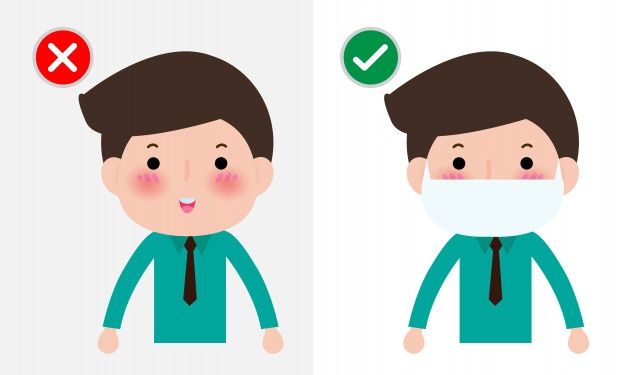

### **WHY FACE MASK?**



*   Wearing a mask is considered to be an important tool in slowing and
preventing the spread of COVID-19. 
*   There is increasing evidence that masks/cloth coverings help prevent
people who have COVID-19 from spreading the virus to others









### **Dataset and Tools used:**

* **Dataset Link:**
https://cdn.iiith.talentsprint.com/CDSE_experiments_data/Industrial_Projects/Facemask.zip

* **Basic Tools:**
–  Sklearn, CNN, Keras,Tensorflow, OpenCV, Pandas, Numpy, Scipy,Matplotlib,Seaborn

* **Data Description:**
 We are provided with both train and test images classified into two classes namely “face & mask”
– The hierarchy of the dataset looks as below:

*  **Train**
     
 1. Face
 2.  Mask

*  **Validation**
 1.  Face
 2.  Mask




###**What is Image Classification?**



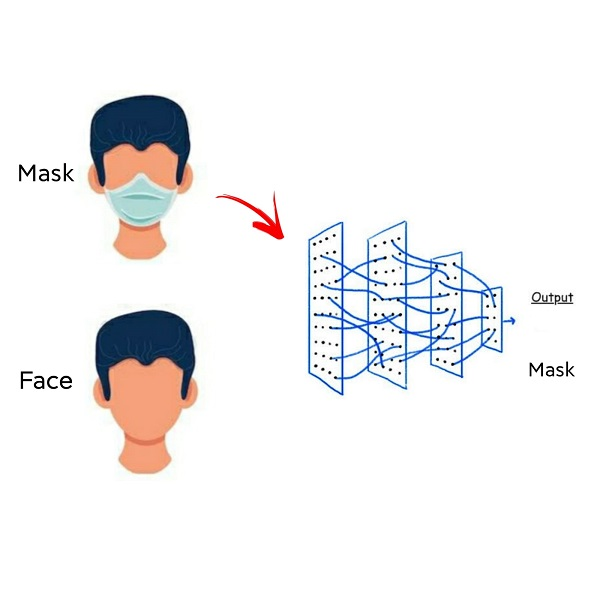

* Image Classification is the task of assigning an input image, one label from a fixed set of categories.
 
* When we perform image classification for our project, our system will receive an image as input.
* Now the system will be aware of a set of categories and its goal is to assign a category to the image.

* As you might know, the computer sees a grid of numbers and not the image of a face as how we see it. 
* Images are 3-dimensional arrays of integers from 0 to 255, of size $Width * Height * 3$. The 3 represents the three color channels Red, Green, Blue.

###**What is Deep Learning?**

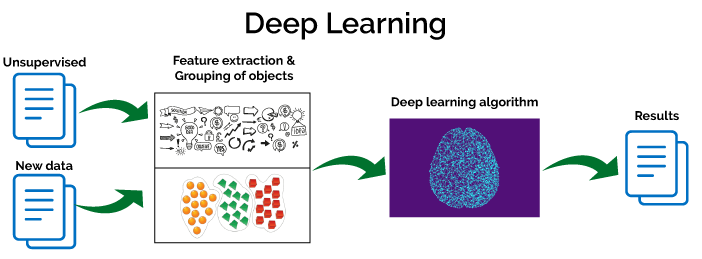

* Deep learning is an artificial intelligence (AI) function that imitates the workings of the human brain in processing data and creating patterns for use in decision making.
*Also known as deep neural learning or deep neural network.


###**Convolution Neural Network (CNN) – What is a CNN and Why Should you use it?**

* Convolutional neural networks (CNN) are all the rage in the deep learning community right now. These CNN models are being used across different applications and domains, and they’re especially prevalent in image and video processing projects.

* The building blocks of CNNs are filters a.k.a. kernels. Kernels are used to extract the relevant features from the input using the convolution operation.

####**CNN Architecture** :
* CNN architecture is inspired by the organization and functionality of the visual cortex and designed to mimic the connectivity pattern of neurons within the human brain.
* The neurons within a CNN are split into a three-dimensional structure, with each set of neurons analyzing a small region or feature of the image.


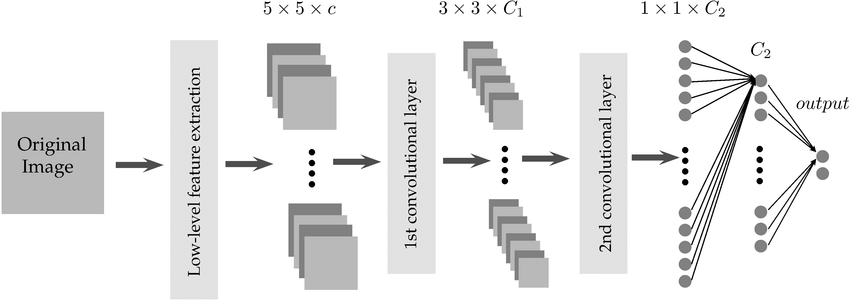

## **KERAS MODEL**

###**Step 1:-Exploratory Data Analysis**
EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods

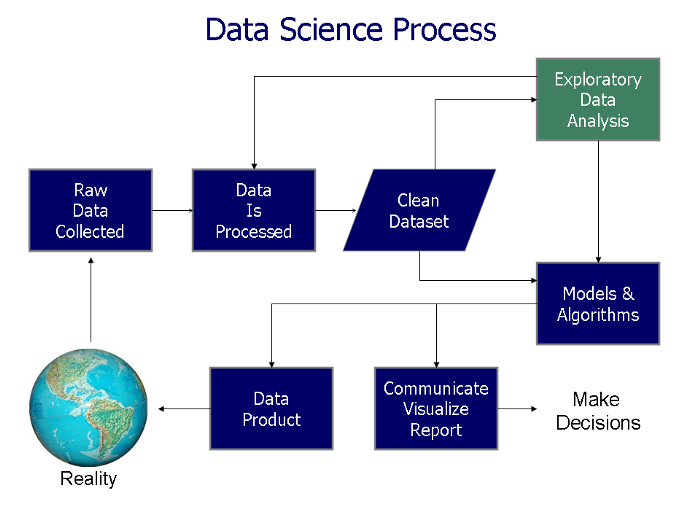


####**Download the Raw data**
The Face vs Mask dataset 

Then download the 105M ZIP archive of the raw data:

In [ ]:
!curl -O https://cdn.iiith.talentsprint.com/CDSE_experiments_data/Industrial_Projects/Facemask.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  105M  100  105M    0     0  14.4M      0  0:00:07  0:00:07 --:--:-- 19.3M


In [ ]:
!unzip -q Facemask.zip


In [ ]:
!ls Facemask

train  validation


####**Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import cv2
import matplotlib.image as mpimg


####**Loading the Datasets:**
Assigning them with labels 0 & 1

In [ ]:
train_dir='/content/Facemask/train'
#The OS module in python provides functions for interacting with the operating system.
categories=os.listdir(train_dir)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'face': 0, 'mask': 1}
['face', 'mask']
[0, 1]


In [ ]:
test_dir = "/content/Facemask/validation"

####**Filtering out corrupted images**


When working with lots of real-world image data, corrupted images are a common occurence. We need to filter out badly-encoded images that do not feature the string "JFIF" in their header.


In [ ]:
num_skipped = 0
for folder_name in categories:
  folder_path=os.path.join(train_dir,folder_name)
  img_names=os.listdir(folder_path)
  for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
      fobj = open(fpath, "rb")
      is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
      fobj.close()
    if not is_jfif:
      num_skipped += 1
            # Delete corrupted image
      os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


####**Plotting the original images randomly**



1.   Randomly selecting the images
2.   plotting $ 2 X 3 $image matrix without rescaling 
3.   Printing the count of file present in folder




In [ ]:
#loading images from subclass folders in the form of list into face and mask
face = [fn for fn in os.listdir(f'{train_dir}/face') if fn.endswith('.jpeg')]
mask = [fn for fn in os.listdir(f'{train_dir}/mask') if fn.endswith('.jpeg')]

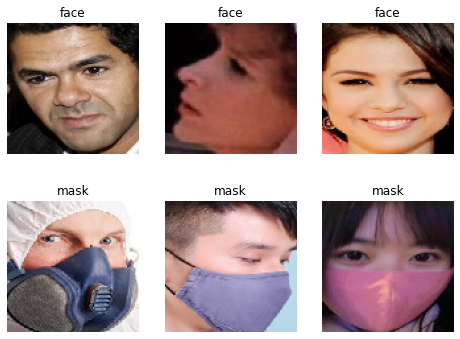

(2210, 2220)

In [ ]:
# randomly select 3 of each
select_face = np.random.choice(face, 3, replace = False)
select_mask = np.random.choice(mask, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/face/{select_face[i]}'
        label = 'face'
    else:
        fp = f'{train_dir}/mask/{select_mask[i-3]}'
        label = 'mask'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100))
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
len(face), len(mask)


####**Images as Matrix**
*For the next few steps, we will work directly with the pixel values of each image so we can do operations on them. We can accomplish this by converting our images into a Numpy array.*


In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # converting image to a matrix
        img_ts = image.img_to_array(current_image)
        # turning that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenating different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if  it is not assigned yet,let us assign one
            full_mat = img_ts
    return full_mat

# running it on our folders i.e face & mask
train_face = img2np(f'{train_dir}/face/', face)
train_mask = img2np(f'{train_dir}/mask/', mask)

#### **Eigen-images**
* We can use a dimension reduction technique such as the principal component analysis (PCA) to visualize the components that describe each class the best. The eigenimages, which is essentially the eigenvectors (components) of PCA of our image matrix, can be reshaped into a matrix and be plotted. It’s also called eigenfaces as this approach was first used for facial recognition research. Here we will visualize the principal components that describe <font color='#FF5733'>70%</font> of variability for each class.*

  $Ax = \lambda x$


Number of PC:  11


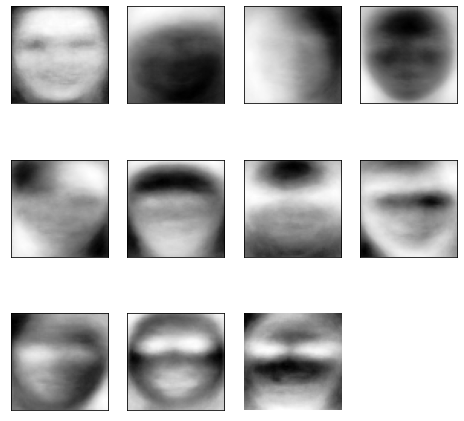

Number of PC:  9


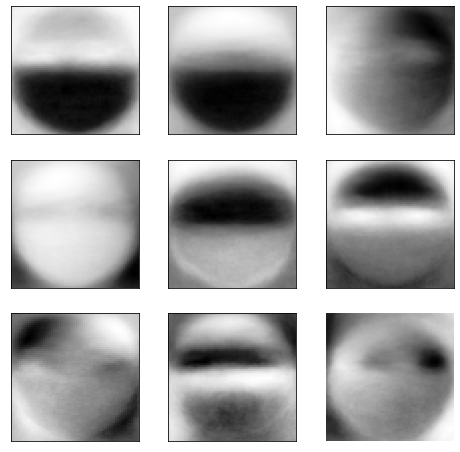

In [ ]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(train_face, 'FACE'))
plot_pca(eigenimages(train_mask, 'MASK'))

* Here we created an orthogonal basis set where each eigenface highlights a certain type of feature, and from which the faces we used can be reconstructed through different combinations and proportions of eigenvectors.
* Because we compressed our vector space so much (and didn’t align the faces to begin with), a lot of the detail got lost, but the faces still remained somewhat recognizable.
the goal for the computer vision problem of human face recognition is to create the minimum number of eigenfaces that can adequately represent the entire training set. If the training set is sufficiently diverse, the resulting set of eigenfaces should be able to represent all of the faces.


####**Converting the Dataset into Pandas dataframe**

In [ ]:
from tqdm import tqdm
import pandas as pd
train_data = []

for i, category in tqdm(enumerate(categories)):
    class_folder = os.path.join(train_dir, category)    
    for path in os.listdir(os.path.join(class_folder)):
        train_data.append(['{}/{}'.format(category, path), category, i])
df = pd.DataFrame(train_data, columns=['filepath', 'class', 'label'])

print('DATAFRAME SHAPE: ',df.shape)
df.head(5)

2it [00:00, 195.16it/s]

DATAFRAME SHAPE:  (4430, 3)


filepath class  label
0     face/face.28_Sports_Fan_Sports_Fan_28_650.jpeg  face      0
1             face/face.38_Tennis_Tennis_38_475.jpeg  face      0
2  face/face.61_Street_Battle_streetfight_61_857....  face      0
3  face/face.16_Award_Ceremony_Awards_Ceremony_16...  face      0
4             face/face.4_Dancing_Dancing_4_491.jpeg  face      0

#####**Bar plot**
* A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent.
* The bar plots can be plotted horizontally or vertically
  



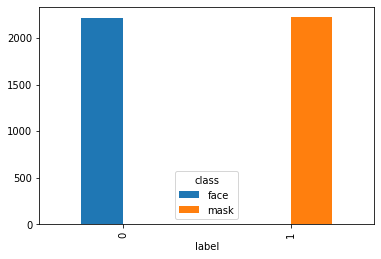

In [ ]:
df.groupby('class').label.value_counts().unstack(0).plot.bar();

* *The above Bar plot describes count of images in two categories:*
  1. face(2210) and
  2.  mask(2220)





#####**Pie plot**
A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. The slices of pie are called wedges.


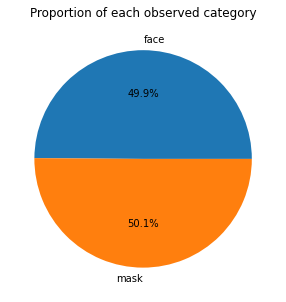

In [ ]:
plt.figure(figsize=(10,5))
pie = [len(face), len(mask)]

plt.pie(pie,
        labels = ['face','mask'],
        autopct='%1.1f%%'       
       )

plt.title('Proportion of each observed category');


   
*   *Pie plot describes images contribution to dataset*
*   *Face:49.9% & Mask:50.1%*











#####**View Distribution**
A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. You can display this chart in three different ways, you can just have the value points displayed showing the distribution, or you can display the bounding box which shows the range or use a combination of both.


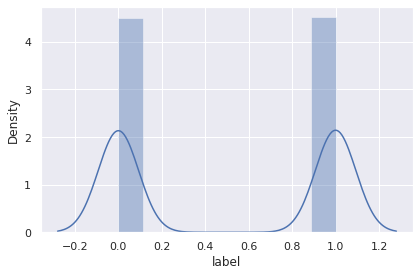

In [ ]:

import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x=df['label']
ax = sns.distplot(x)
plt.tight_layout()
plt.show()


This plot describes the data which is being equally distributed in two categories.

####**Generate a Dataset**


*  Using Keras Preprocessing techniques we import training and validation image datasets from directory.
*   In this we declare image size and batch size. 






In [ ]:
image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle =True
)

Found 4430 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 1916 files belonging to 2 classes.


####**Visualize the training data**

* We import matplotlib library for plotting the images

* Here are the first 9 images in the training dataset. As you can see label 1 is "mask" and label 0 is "face"

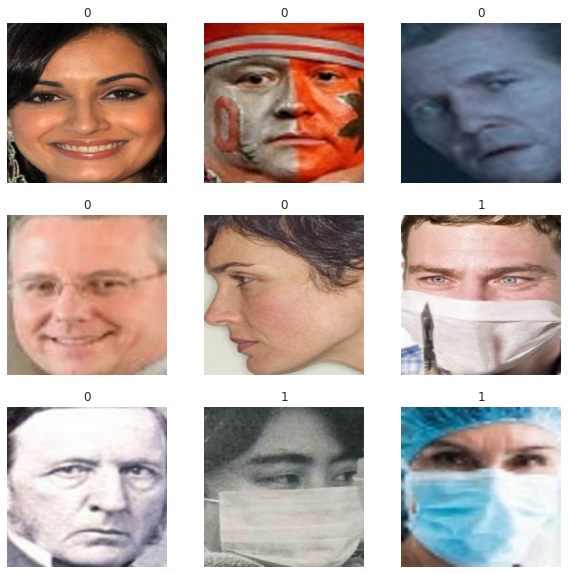

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


####**Image data augmentation**
* Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.
* Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

* Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1)
    ]
)

Let's visualize what the augmented samples look like, by applying data_augmentation repeatedly to the first image in the dataset:

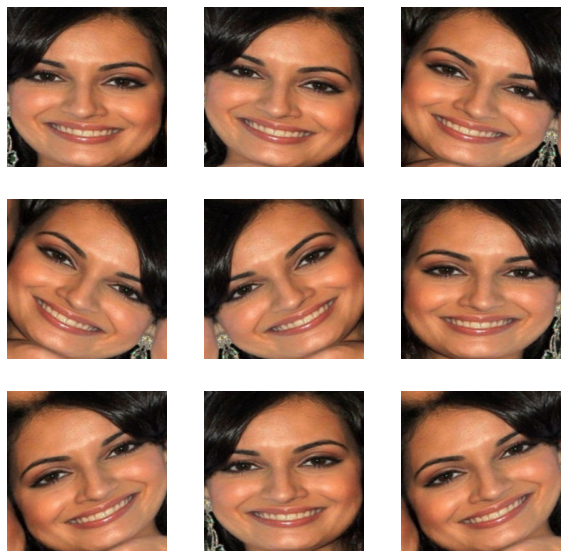

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

###**Step 2:- Build a model**



**KERAS**

* Keras is a neural network library while TensorFlow is the open-source library for a number of various tasks in machine learning. 
* TensorFlow provides both high-level and low-level APIs while Keras provides only high-level APIs.


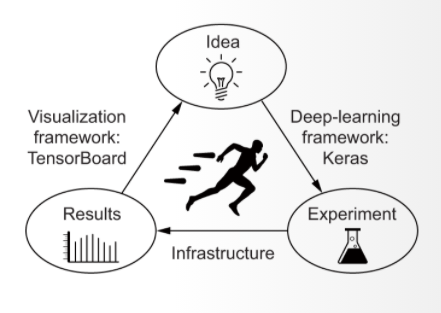

* We'll build a small version of the Xception network. 

- We start the model with the **data_augmentation**` preprocessor, followed by a
 **Rescaling** layer.
- We include a `Dropout` layer before the final classification layer.


* Let’s define a simple CNN model with Convolutional layers followed by BatchNormalization and then Activation layers. A dropout layer is added to avoid overfitting.

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 224, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(inputs, outputs)



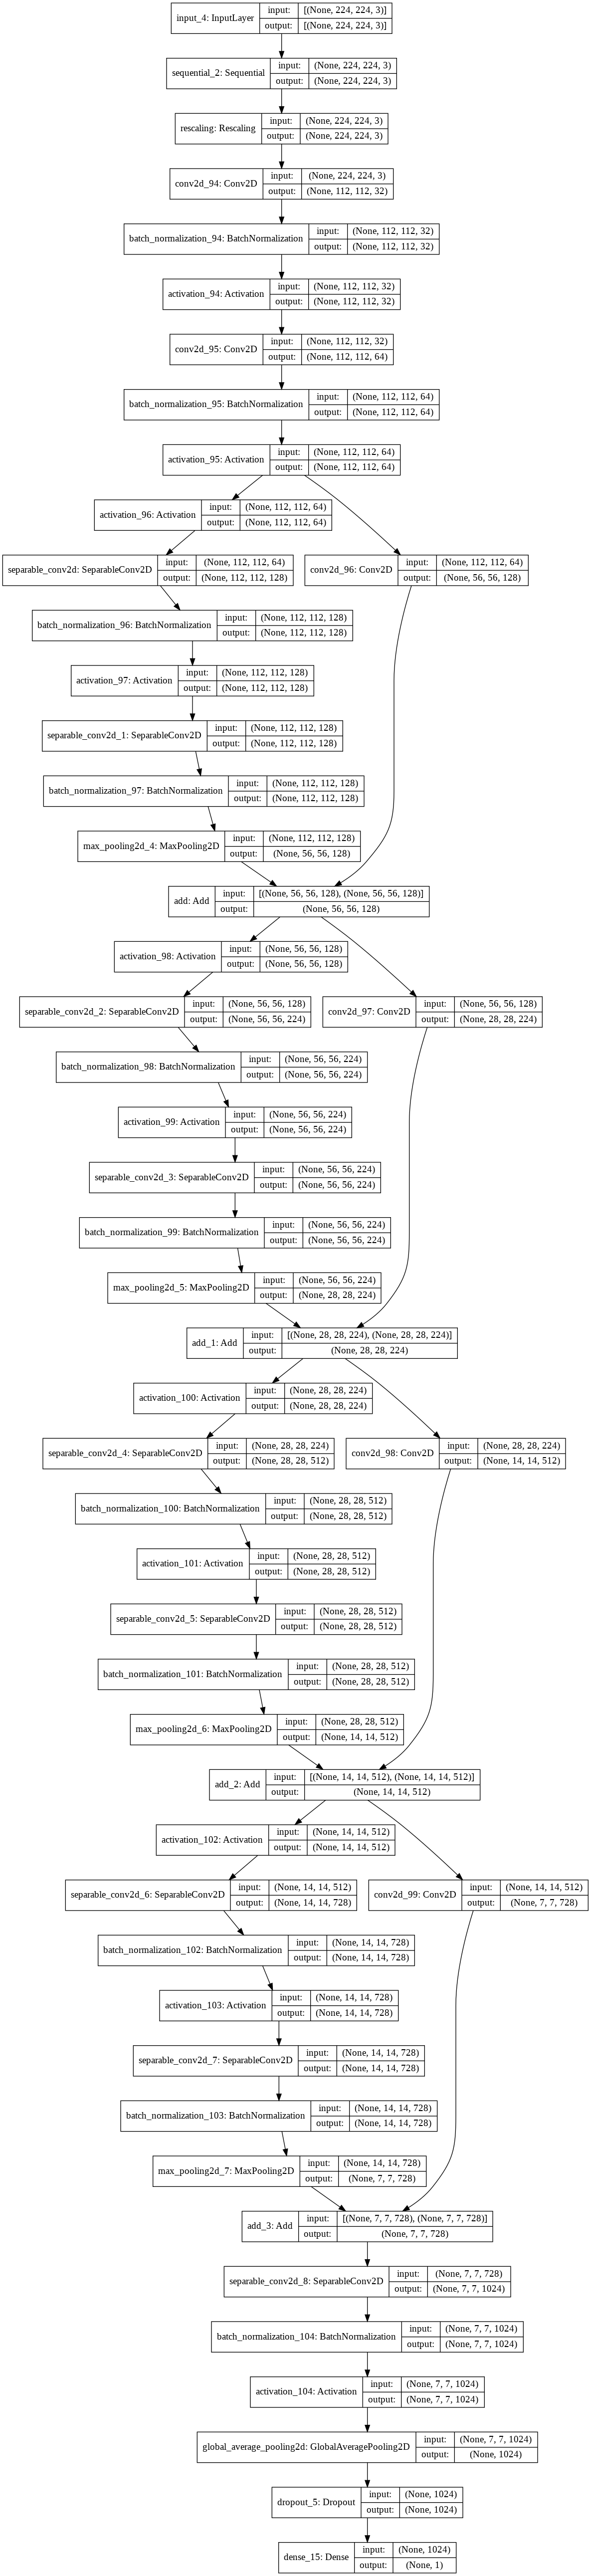

In [ ]:
keras_model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(keras_model, show_shapes=True)


####**Train the model**
*Let’s compile the model now using Adam as our optimizer and binary_crossentropy as the loss function. We are using a lower learning rate of 0.0001 for a smoother curve.*

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
keras_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
#Now, let’s train our model for 20 epochs since our learning rate is very small.
history_1 = keras_model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/20
139/139 [==============================] - 49s 333ms/step - loss: 0.4837 - accuracy: 0.7992 - val_loss: 0.6940 - val_accuracy: 0.5647
Epoch 2/20
139/139 [==============================] - 46s 326ms/step - loss: 0.2763 - accuracy: 0.8935 - val_loss: 0.7235 - val_accuracy: 0.5647
Epoch 3/20
139/139 [==============================] - 46s 326ms/step - loss: 0.2111 - accuracy: 0.9230 - val_loss: 0.4021 - val_accuracy: 0.8361
Epoch 4/20
139/139 [==============================] - 45s 325ms/step - loss: 0.1761 - accuracy: 0.9389 - val_loss: 0.3299 - val_accuracy: 0.8716
Epoch 5/20
139/139 [==============================] - 46s 327ms/step - loss: 0.1758 - accuracy: 0.9383 - val_loss: 0.3563 - val_accuracy: 0.9024
Epoch 6/20
139/139 [==============================] - 45s 326ms/step - loss: 0.1408 - accuracy: 0.9487 - val_loss: 0.4693 - val_accuracy: 0.8664
Epoch 7/20
139/139 [==============================] - 45s 326ms/step - loss: 0.1485 - accuracy: 0.9449 - val_loss: 0.2800 - val_ac

###**Step 3:-Evaluating the result**
We will plot our training and validation accuracy along with training and validation loss.

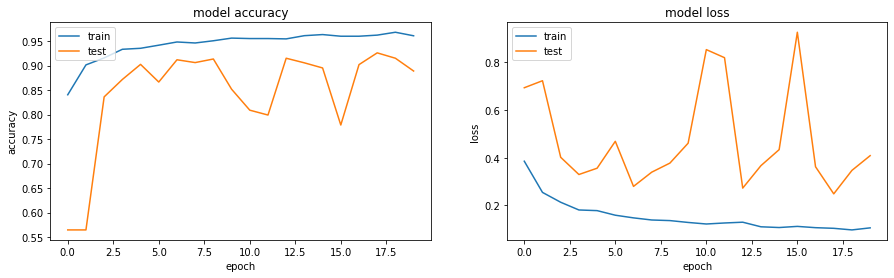

In [ ]:
# summarize history for accuracy
plt.subplots(figsize=(15,4))
plt.subplot(121)  
plt.plot(history_1.history['accuracy'])  
plt.plot(history_1.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  
   
plt.subplot(122)  
plt.plot(history_1.history['loss'])  
plt.plot(history_1.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

##**THE ART OF TRANSFER LEARNING**
* Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.
* Another crucial application of transfer learning is when the dataset is large, by using a pre-trained model on similar images we can easily achieve high performance. 
*  Since our problem statement is a good fit for transfer learning lets see how we can go about implementing a pre-trained model and what accuracy we are able to achieve.





##**USING PRE-TRAINED MODELS**:

**Import Libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2  ,preprocess_input

### **1)MobileNetV2**

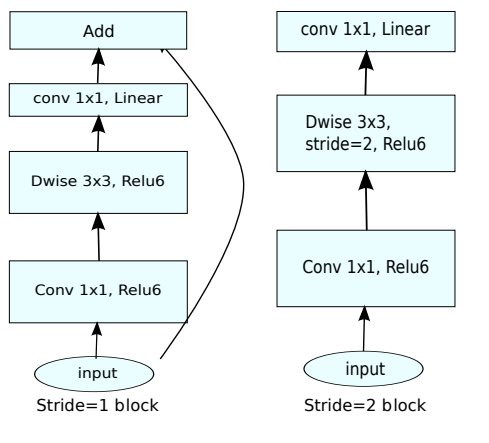

**Description:**
* MobileNet-v2 is a convolutional neural network that is 53 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database.
* In MobileNetV2, there are two types of blocks. One is residual block with stride of 1. Another one is block with stride of 2 for downsizing.

There are 3 layers for both types of blocks.
1. The first layer is 1×1 convolution with ReLU6.
2. The second layer is the depthwise convolution.
3. The third layer is another 1×1 convolution but without any non-linearity. 
It is claimed that if ReLU is used again, the deep networks only have the power of a linear classifier on the non-zero volume part of the output domain.
* We will create a base model from the MobileNetV2 model. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. This base of knowledge will help us classify Face and Mask from our specific dataset.


####**Step 1:- Import the model**


* The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

In [ ]:
from keras.preprocessing.image import img_to_array,ImageDataGenerator
image_size = (224, 224)
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

# Load and iterate train dataset
train_dir = "/content/Facemask/train"
train_generator = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=100,class_mode='binary')

# Load and iterate test dataset
test_dir = "/content/Facemask/validation"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = validation_datagen.flow_from_directory(test_dir, target_size=image_size,batch_size=100,class_mode='binary')

train_steps = train_generator.n // 100
test_steps = test_generator.n // 100

train_generator.image_shape

Found 4430 images belonging to 2 classes.
Found 1916 images belonging to 2 classes.


(224, 224, 3)

By specifying the include_top=False argument, you load a network that doesn’t include the classification layers at the top.

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.mobilenet import MobileNet
mobile = MobileNetV2(weights="imagenet",
                    include_top=False,
                    input_shape=(224,224,3))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
#It is important to freeze our base before we compile and train the model. 
#Freezing will prevent the weights in our base model from being updated during training.
mobile.trainable = False 
mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
from keras.models import Sequential
mobilenetv2 = Sequential([
        # MobileNetV2_mobile added as a layer
        mobile,
        # here is our custom prediction layer 
        Flatten(),
        Dropout(0.50),
        Dense(1048, activation='relu'),
        Dense(512, activation='relu'),
        Dense(224, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.10),         
        Dense(1, activation='sigmoid')
    ])

In [ ]:
mobilenetv2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62720)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1048)              65731608  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               537088    
_________________________________________________________________
dense_7 (Dense)              (None, 224)               114912    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1

In [ ]:
#Next, let’s compile the model and start training it.
from keras.optimizers import Adam
mobilenetv2.compile(optimizer=Adam(lr = 0.00001),loss="binary_crossentropy",metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='accuracy', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

history2=mobilenetv2.fit(train_generator,steps_per_epoch=train_steps,validation_data=test_generator,
                            validation_steps=test_steps,callbacks=[monitor], epochs=40)

Epoch 1/40
44/44 [==============================] - 49s 1s/step - loss: 0.5909 - accuracy: 0.6888 - val_loss: 0.4039 - val_accuracy: 0.8426
Epoch 2/40
44/44 [==============================] - 46s 1s/step - loss: 0.2479 - accuracy: 0.9026 - val_loss: 0.4009 - val_accuracy: 0.8605
Epoch 3/40
44/44 [==============================] - 47s 1s/step - loss: 0.2103 - accuracy: 0.9207 - val_loss: 0.4223 - val_accuracy: 0.8574
Epoch 4/40
44/44 [==============================] - 46s 1s/step - loss: 0.1917 - accuracy: 0.9276 - val_loss: 0.3763 - val_accuracy: 0.8726
Epoch 5/40
44/44 [==============================] - 47s 1s/step - loss: 0.1622 - accuracy: 0.9398 - val_loss: 0.4004 - val_accuracy: 0.8763
Epoch 6/40
44/44 [==============================] - 47s 1s/step - loss: 0.1707 - accuracy: 0.9330 - val_loss: 0.3815 - val_accuracy: 0.8853
Epoch 7/40
44/44 [==============================] - 47s 1s/step - loss: 0.1602 - accuracy: 0.9344 - val_loss: 0.3670 - val_accuracy: 0.8832
Epoch 8/40
44/44 [==

####**Step 2:- Evaluating the result**

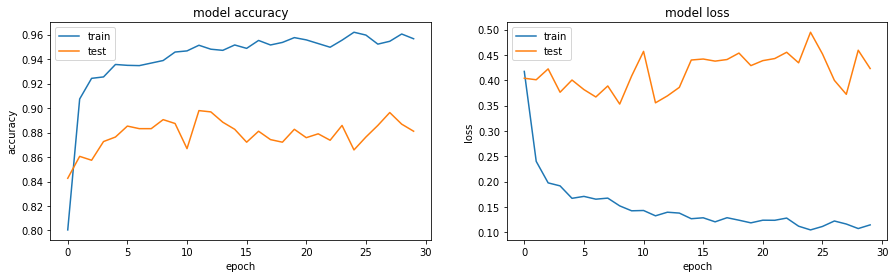

In [ ]:
# summarize history for accuracy
plt.subplots(figsize=(15,4))
plt.subplot(121)  
plt.plot(history2.history['accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  
   
plt.subplot(122)  
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

###**2)VGG16**

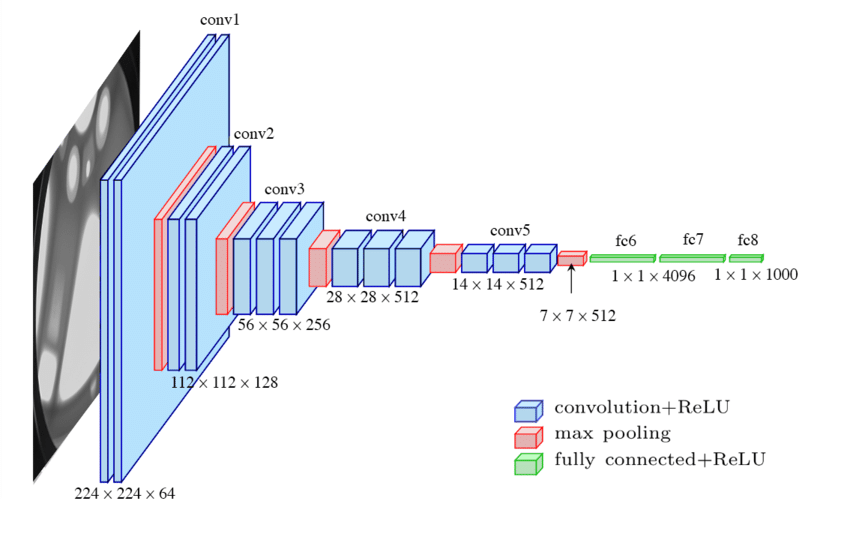

**Description:**
* VGGNet consists of 16 convolutional layers and is very appealing because of its very uniform architecture.
 Similar to AlexNet, only 3x3 convolutions, but lots of filters. Trained on 4 GPUs for 2–3 weeks.
* It is currently the most preferred choice in the community for extracting features from images. 
* The weight configuration of the VGGNet is publicly available and has been used in many other applications and challenges as a baseline feature extractor.
* However, VGGNet consists of 138 million parameters, which can be a bit challenging to handle.
* VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it.
* The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.
* Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2.It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture.
* In the end it has 2 FC(fully connected layers) followed by a softmax for output.


#####**Step 1:- Import the model**


In [ ]:
#By specifying the include_top=False argument, 
#you load a network that doesn’t include the classification layers at the top.
from tensorflow.keras.applications import VGG16
vgg_base = VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(224, 224, 3))

print(vgg_base.summary())

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
#It is important to freeze our base before we compile and train the model. 
#Freezing will prevent the weights in our base model from being updated during training.
vgg_base.trainable = False 
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout

vgg = Sequential([
        # our vgg16_base model added as a layer
        vgg_base,
        # here is our custom prediction layer 
        Flatten(),
        Dropout(0.50),
        Dense(1048, activation='relu'),
        Dense(512, activation='relu'),
        Dense(224, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.10),         
        Dense(1, activation='sigmoid')
    ])

In [ ]:
vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1048)              26293272  
_________________________________________________________________
dense_11 (Dense)             (None, 512)               537088    
_________________________________________________________________
dense_12 (Dense)             (None, 224)               114912    
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [ ]:
#Next, let’s compile the model and start training it.
from keras.optimizers import Adam
vgg.compile(optimizer=Adam(lr=1e-4), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='accuracy', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

history_3=vgg.fit_generator(train_generator,steps_per_epoch=train_steps,validation_data=test_generator,
                            validation_steps=test_steps,callbacks=[monitor],verbose=2, epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
44/44 - 51s - loss: 0.4056 - accuracy: 0.8134 - val_loss: 0.2801 - val_accuracy: 0.8884
Epoch 2/20
44/44 - 48s - loss: 0.2712 - accuracy: 0.8885 - val_loss: 0.3215 - val_accuracy: 0.8737
Epoch 3/20
44/44 - 49s - loss: 0.2263 - accuracy: 0.9139 - val_loss: 0.3303 - val_accuracy: 0.8758
Epoch 4/20
44/44 - 49s - loss: 0.2028 - accuracy: 0.9222 - val_loss: 0.3004 - val_accuracy: 0.8916
Epoch 5/20
44/44 - 48s - loss: 0.2127 - accuracy: 0.9166 - val_loss: 0.4301 - val_accuracy: 0.8332
Epoch 6/20
44/44 - 48s - loss: 0.2236 - accuracy: 0.9136 - val_loss: 0.3773 - val_accuracy: 0.8563
Epoch 7/20
44/44 - 48s - loss: 0.1872 - accuracy: 0.9256 - val_loss: 0.3738 - val_accuracy: 0.8658
Epoch 8/20
44/44 - 48s - loss: 0.1924 - accuracy: 0.9259 - val_loss: 0.3212 - val_accuracy: 0.8911
Epoch 9/20
44/44 - 48s - loss: 0.1951 - accuracy: 0.9229 - val_loss: 0.4039 - val_accuracy: 0.8653
Epoch 10/20
44/44 - 49s - loss: 0.1865 - accuracy: 0.9282 - val_loss: 0.2629 - val_accuracy: 0.9000
Epoch 11/

#####**Step 2:- Evaluating the result**

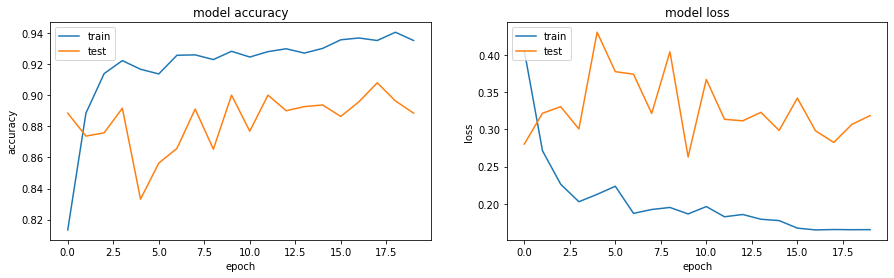

In [ ]:
# summarize history for accuracy
plt.subplots(figsize=(15,4))
plt.subplot(121)  
plt.plot(history_3.history['accuracy'])  
plt.plot(history_3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  
   
plt.subplot(122)  
plt.plot(history_3.history['loss'])  
plt.plot(history_3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

###**3)InceptionV3**

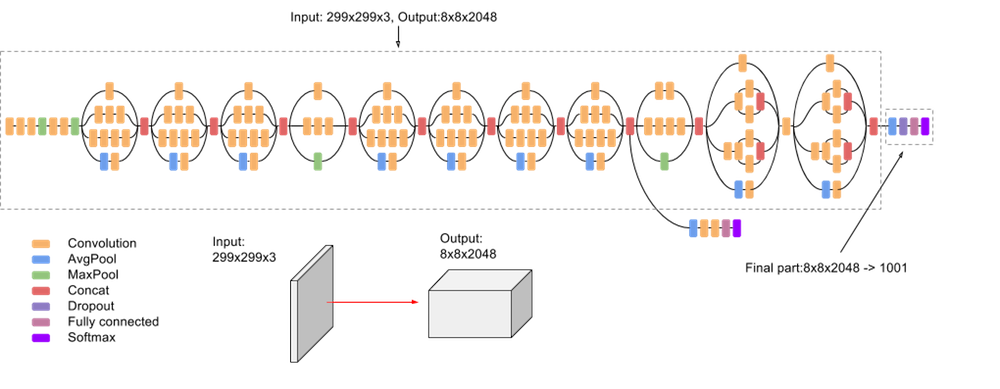

**Description:**
* Inception-v3 is a convolutional neural network architecture from the Inception family that makes several improvements including using Label Smoothing, Factorized 7 x 7 convolutions, and the use of an auxiliary classifer to propagate label information lower down the network (along with the use of batch normalization for layers in the sidehead).
* Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset.


#####**Step 1:- Import the model**

In [ ]:
# load the inception_v3 network, ensuring the head FC layer sets are left off
Inception_Model = inception_v3.InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
Inception_Model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
Inception_Model.trainable = False # Freezing the weights
Inception_Model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
headModel = Inception_Model.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [ ]:
# Actual model which we will train
inc = Model(inputs=Inception_Model.input, outputs=headModel)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Compiling our Model using Adam optimiser
print("[INFO] compiling model...")
opt=RMSprop(lr=0.0001)
inc.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [ ]:
inc.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='accuracy', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

history_4=inc.fit(train_generator,steps_per_epoch=train_steps,validation_data=test_generator,
                            validation_steps=test_steps,callbacks=[monitor], epochs=40)

Epoch 1/40
44/44 [==============================] - 57s 1s/step - loss: 1.0009 - accuracy: 0.7080 - val_loss: 0.4510 - val_accuracy: 0.8532
Epoch 2/40
44/44 [==============================] - 47s 1s/step - loss: 0.3139 - accuracy: 0.8619 - val_loss: 0.4348 - val_accuracy: 0.9084
Epoch 3/40
44/44 [==============================] - 48s 1s/step - loss: 0.2265 - accuracy: 0.9126 - val_loss: 0.3489 - val_accuracy: 0.9137
Epoch 4/40
44/44 [==============================] - 47s 1s/step - loss: 0.1835 - accuracy: 0.9312 - val_loss: 0.3435 - val_accuracy: 0.9242
Epoch 5/40
44/44 [==============================] - 47s 1s/step - loss: 0.2107 - accuracy: 0.9253 - val_loss: 0.4306 - val_accuracy: 0.9226
Epoch 6/40
44/44 [==============================] - 48s 1s/step - loss: 0.1565 - accuracy: 0.9399 - val_loss: 0.5576 - val_accuracy: 0.9053
Epoch 7/40
44/44 [==============================] - 48s 1s/step - loss: 0.1579 - accuracy: 0.9379 - val_loss: 0.5233 - val_accuracy: 0.8942
Epoch 8/40
44/44 [==

#####**Step 2:- Evaluating the result**

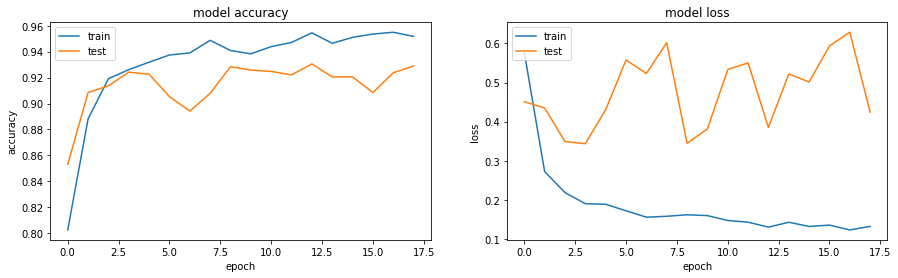

In [ ]:
# summarize history for accuracy
plt.subplots(figsize=(15,4))
plt.subplot(121)  
plt.plot(history_4.history['accuracy'])  
plt.plot(history_4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  
   
plt.subplot(122)  
plt.plot(history_4.history['loss'])  
plt.plot(history_4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

##**Run inference on new data**

* Note that data augmentation and dropout are inactive at inference time.


In [ ]:
!wget -qq -O 1.jpg https://images.theconversation.com/files/336067/original/file-20200519-152327-1dts6e7.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=1200.0&fit=crop 

In [ ]:
!wget -qq -O 2.jpg http://pngimg.com/uploads/face/face_PNG5645.png

In [ ]:
!wget -qq -O 3.jpg https://www.henryford.com/-/media/henry-ford-blog/images/mobile-interior-banner-images/2020/07/mask-myths.jpg

In [ ]:
def predict_image(img_path, model):
  img = keras.preprocessing.image.load_img(img_path,target_size=image_size)
  plt.imshow(img)
  plt.axis('off')
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis

  predictions = model.predict(img_array)
  score = predictions[0]
  
  if score > 0.5:
    print("Mask")
  else:
    print("face")
  print("This image is %.2f percent Face without mask and %.2f percent Face with mask." % (100 * (1 - score), 100 * score))
  return None

face
This image is 74.85 percent Face without mask and 25.15 percent Face with mask.
face
This image is 95.75 percent Face without mask and 4.25 percent Face with mask.
face
This image is 52.43 percent Face without mask and 47.57 percent Face with mask.


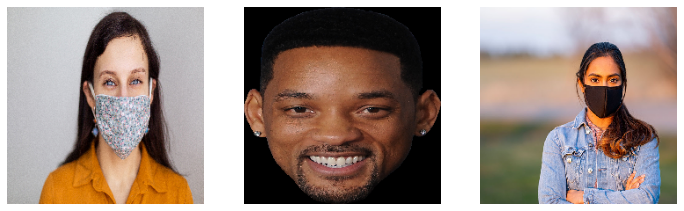

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(131)
predict_image('1.jpg',keras_model)
plt.subplot(132)
predict_image('2.jpg',keras_model)
plt.subplot(133)
predict_image('3.jpg',keras_model)


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
label_names = {v: k for k, v in train_generator.class_indices.items()}
label_names

{0: 'face', 1: 'mask'}

In [ ]:

def predict(imagepath,model_name):
  img = mpimg.imread(imagepath)
  imgplot = plt.imshow(img)

  img = cv2.imread(imagepath)

  img = cv2.resize(img,(224,224))

  img = np.reshape(img,[1,224,224,3])

  img = img/255.0

  classes = model_name.predict(img)
  
  print("This image is %.2f percent Face without mask and %.2f percent Face with mask." 
      %(100 * (1 -classes ), 100 * classes))
  return None

This image is 0.19 percent Face without mask and 99.81 percent Face with mask.
This image is 99.88 percent Face without mask and 0.12 percent Face with mask.
This image is 0.15 percent Face without mask and 99.85 percent Face with mask.


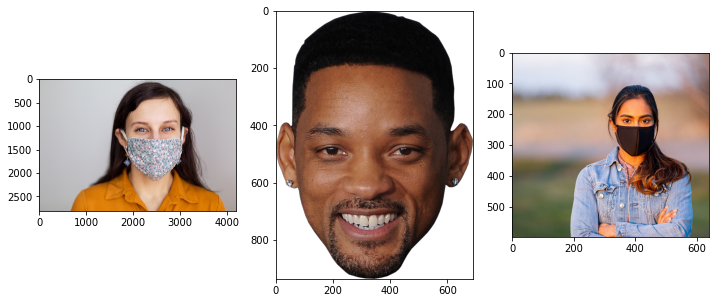

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(131)
predict('1.jpg',mobilenetv2)
plt.subplot(132)
predict('2.jpg',mobilenetv2)
plt.subplot(133)
predict('3.jpg',mobilenetv2)


This image is 12.79 percent Face without mask and 87.21 percent Face with mask.
This image is 99.56 percent Face without mask and 0.44 percent Face with mask.
This image is 44.87 percent Face without mask and 55.13 percent Face with mask.


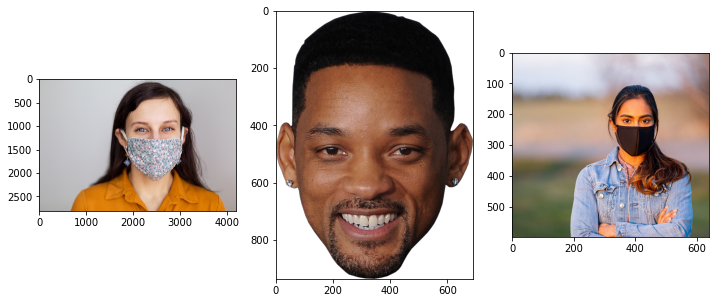

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(131)
predict('1.jpg',vgg)
plt.subplot(132)
predict('2.jpg',vgg)
plt.subplot(133)
predict('3.jpg',vgg)

This image is 0.05 percent Face without mask and 99.95 percent Face with mask.
This image is 99.92 percent Face without mask and 0.08 percent Face with mask.
This image is 3.92 percent Face without mask and 96.08 percent Face with mask.


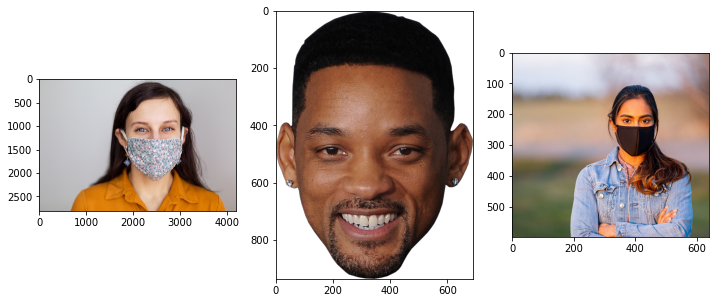

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(131)
predict('1.jpg',inc)
plt.subplot(132)
predict('2.jpg',inc)
plt.subplot(133)
predict('3.jpg',inc)


### **Camera Capture**
Using a webcam to capture images for processing on the runtime.

In [ ]:
#@title Capture Camera 
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename



### **Camera Live Capturing Python code using JS**

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


This image is 0.06 percent Face without mask and 99.94 percent Face with mask.


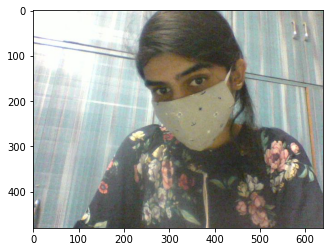

In [ ]:
predict('photo.jpg',inc)

In [ ]:
inc.save("inception_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
Inception_model = load_model('/content/inception_model.h5')

In [ ]:
!wget -qq -O heechul.jpg https://www.channelnewsasia.com/image/11782158/1x1/600/600/b461a22bf27e2dcd65214a2a1506daae/sU/photo-super-junior-kim-heechul.jpg

This image is 94.94 percent Face without mask and 5.06 percent Face with mask.


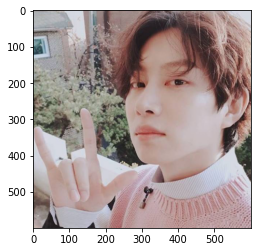

In [ ]:
predict('heechul.jpg',Inception_model)

###**SUMMARY:**
* The world is facing a huge health crisis due to the rapid transmission of coronavirus (COVID-19).
* Several guidelines were issued by the World Health Organization (WHO) for protection against the spread of coronavirus. 
*According to WHO, the most effective preventive measure against COVID-19 is <font color='#cc00cc'>wearing a mask </font>in public places and crowded areas. It is very difficult to monitor people manually in these areas.
* In this project, we have developed a deep learning model for face mask classification using Python, Keras, and OpenCV. We developed the face mask classification model for detecting whether person is wearing a mask or not. We have trained the model using Keras with network architecture.
* Here we trained '**keras model**' in which we acheived the training accuracy of <font color='#0000cc'>96.03%</font>
  and validation accuracy of <font color='#FF5733'>88.88%</font>
* And we have used three pre-trained models: 1) MobileNetV2 ,2) VGG16 and 3) InceptionV3 to test the training and validation accuracies by running some epochs and tuned the hyperparameters by freezing the weights which resulted as follows:
* In '**MobileNet V2 model**' we got a training accuracy of <font color='#0000cc'>96.06 %</font> and a validation accuracy of <font color='#FF5733'>88.11 %</font> .
* So, we trained another model i.e '**VGG16**' to test a higher accuracy and we got a training accuracy of <font color='#0000cc'>93.51 %</font> and a validation accuracy of <font color='#FF5733'>88.84 % </font>.
* we used another model '**Inception V3**' , this time we got the best accuracy in two of the other models, i.e a training accuracy of<font color='#0000cc'>95.14%</font>  and a validation accuracy of <font color='#FF5733'>92.89 % </font>.
* Hence,at the end  we chose <font color='#cc0066'>**INCEPTION V3** </font> model which has best accuracy compared with other models  for FACE MASK CLASSIFICATION for better results.


##### **REFERENCE AND ATTRIBUTES:**
* https://keras.io/api/applications

* https://towardsdatascience.com/eigenvectors-and-eigenvalues-all-you-need-to-know-df92780c591f 

* https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

* https://keras.io/api/preprocessing/image/

* https://www.tensorflow.org/tutorials/images/classification

* https://www.freepik.com/premium-vector/coronavirus-2019-ncov-covid-19-disease-prevention-concept-man-with-wearing-face-mask-without-mask-health-care-isolated-white-background-illustration_7348405.htm

* https://www.xenonstack.com/blog/log-analytics-deep-machine-learning/

* https://medium.com/towards-artificial-intelligence/the-architecture-and-implementation-of-vgg-16-b050e5a5920b

* https://paperswithcode.com/method/mobilenetv2

* https://paperswithcode.com/method/inception-v3

* https://en.wikipedia.org/wiki/Exploratory_data_analysis





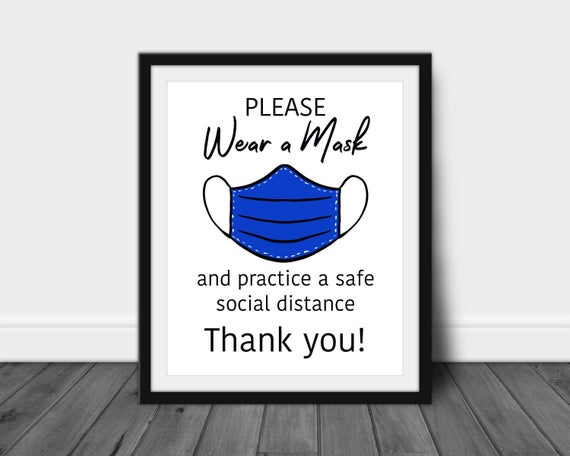